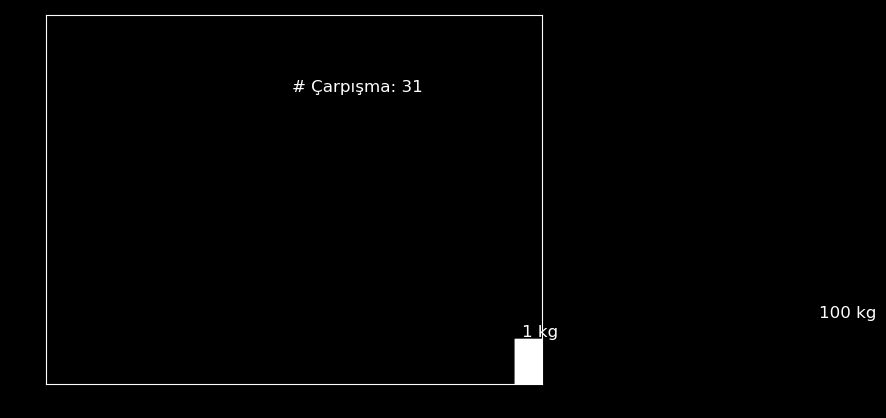

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from decimal import Decimal, getcontext
from IPython.display import HTML
import matplotlib.patches as patches

# Set the precision for Decimal calculations
getcontext().prec = 25

class Block:
    def __init__(self, x, y, w, h, m, v):
        self.x = Decimal(str(x))
        self.y = Decimal(str(y))
        self.w = Decimal(str(w))
        self.h = Decimal(str(h))
        self.m = Decimal(str(m))
        self.v = Decimal(str(v))
    
    def bounding_box(self):
        right = self.x + self.w
        bottom = self.y + self.h
        return BoundingBox(self.x, right, self.y, bottom)
    
    def move(self):
        self.x += self.v

class BoundingBox:
    def __init__(self, left, right, top, bottom):
        self.left = left
        self.right = right
        self.top = top
        self.bottom = bottom

def collision(a, b):
    bbA = a.bounding_box()
    bbB = b.bounding_box()
    return (bbA.right > bbB.left and bbA.left < bbB.right and
            bbA.bottom > bbB.top and bbA.top < bbB.bottom)

def count_collision():
    global collision_count
    collision_count += 1

def bounce(a, b):
    if a.m == -1:
        b.v = -b.v
        b.move()
    elif b.m == -1:
        a.v = -a.v
        a.move()
    else:
        v1 = a.v
        v2 = b.v
        m1 = a.m
        m2 = b.m
        m_sum = m1 + m2

        a.v = (m2 * v2 * 2 + v1 * (m1 - m2)) / m_sum
        b.v = (m1 * v1 * 2 + v2 * (m2 - m1)) / m_sum

        a.move()
        b.move()

# Initial positions and properties
block1 = Block(30, 0, 10, 15, 1, 0)
block2 = Block(70, 0, 15, 20, 100, -0.4)
wall = Block(0, 0, 1, 200, -1, 0)
floor = Block(0, -1, 800, 1, -1, 0)
wall_edge = wall.bounding_box().right

collision_count = 0

# Setting up the plot
fig, ax = plt.subplots()
ax.set_xlim(1, 100)
ax.set_ylim(3, 100)

# Adding background color and grid
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='black')  # Hide x-axis numbers
ax.tick_params(axis='y', colors='black')  # Hide y-axis numbers

# Plotting the blocks with 3D effect
white_box = patches.FancyBboxPatch((float(block1.x), float(block1.y)), float(block1.w), float(block1.h),
                                   boxstyle="round,pad=0.3", fc='white', ec='black', mutation_aspect=0.5)
blue_box = patches.FancyBboxPatch((float(block2.x), float(block2.y)), float(block2.w), float(block2.h),
                                  boxstyle="round,pad=0.3", fc='deepskyblue', ec='black', mutation_aspect=0.5)

ax.add_patch(white_box)
ax.add_patch(blue_box)

# Display collision count
collision_text = ax.text(50, 80, f'# Collisions: {collision_count}', color='white', fontsize=12)

# Mass labels
white_mass_text = ax.text(float(block1.x + Decimal('0.5') * block1.w), float(block1.y + block1.h + Decimal('0.5')), '1 kg', color='white', fontsize=12, ha='center')
blue_mass_text = ax.text(float(block2.x + Decimal('0.5') * block2.w), float(block2.y + block2.h + Decimal('0.5')), '100 kg', color='white', fontsize=12, ha='center')

def update(frame):
    global collision_count
    
    block1.move()
    block2.move()
    
    if collision(block1, block2):
        count_collision()
        bounce(block1, block2)
    
    if block1.x < wall_edge:
        count_collision()
        bounce(block1, wall)
    
    # Update the positions and text
    white_box.set_x(float(block1.x))
    blue_box.set_x(float(block2.x))
    collision_text.set_text(f'# Çarpışma: {collision_count}')
    
    # Update mass labels
    white_mass_text.set_position((float(block1.x + Decimal('0.5') * block1.w), float(block1.y + block1.h + Decimal('0.5'))))
    blue_mass_text.set_position((float(block2.x + Decimal('0.5') * block2.w), float(block2.y + block2.h + Decimal('0.5'))))
    
    return white_box, blue_box, collision_text, white_mass_text, blue_mass_text

ani = animation.FuncAnimation(fig, update, frames=range(500), blit=True, interval=50)

# Display the animation in the notebook
HTML(ani.to_jshtml())
